# **Introduction**

This report will be written using the 'student_data_2.csv' file located in the root directory of this collab directory. This dataset will be mentioned significantly throughout this report and will often be reffered to as the acronym 'SD'.    

The SD file is a tabular dataset based from a larger data source containing student records enrolled in different undergraduate degrees. The original source of the SD dateset was aquirred from serval disjoint databases, and includes information on students sex, nationality, marital status, attendance etc.  

Data from students was taken at the time of enrollment and records their performance at the end of their first and second semesters of studying. More information can be found here: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

The SD dataset is a condensed version of the original data, and intends to highlight trends in students, and predict students dropout rates and academic success.

The objective of this report is to review and analyse the SD dateset in order to identify any patterns or corelations in the data that relates to student dropout rates. Understanding the contributing factors between successful and unsuccsessful students will allow teaching instututions to identify students at a greater risk of dropping out and intervene sooner. The ideal outcome of this investigation would be an improvement to overall graduation rates through understanding the factors that contribute to student drop out rates.

# **Understanding The Dataset**

Before we can analyse anything, I must import the relevant libraries that will allow me to perform the approrpiate data analystic techniques.
This section of code must be run before all others in order to successfully complete the imports.

In [ ]:
# Importing relevant libraries
import plotly
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import pearsonr
!pip install -U kaleido


Next I must import the dataset itself.
After the SD is read into a dataframe, a good practice is to try to get a better understanding of the dataframe itself. To do this, I can use the the following commands:

**Shape**: returns the number of rows and collumns. (size of the dataframe)

**Head**: returns rows of the dataset (first 5 rows by default).

In [ ]:
# Read dataset from csv file
df =  pd.read_csv("student_data_2.csv")

#print how many rows and columns there are
print("Shape of DataFrame:", df.shape)


Shape of DataFrame: (4425, 15)


In [ ]:
#setting the layout options for the output of the dataframe so that the data is more readable.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 250)
#prints first 5 rows of the dataset
print(df.head())

  Marital_status  Application_order                           Course  Previous_qualification  Mother's_qualification  Father's_qualification  Admission_grade Educational_special_needs  Gender Scholarship_holder  Age_at_enrollment  \
0         single                NaN                          Nursing                     NaN                     NaN                     NaN              NaN                        no  female                 no                NaN   
1              ?                5.0  Animation and Multimedia Design                     1.0                    19.0                    12.0            127.3                        no    male                 no               20.0   
2         single                1.0                          Tourism                     1.0                     1.0                     3.0            142.5                        no    male                 no               19.0   
3         single                5.0             Communication Design

As we can clearly see from  above, there is a lot of data in this dataset, some of which looks fairly unorganised. To try and gain an even better understanding of the data fields I am going to take a look at the unique data in some of the collumns. This can be done by using the .unique() command, where I will loop through each column in the dataframe and list the unique values in each.

Using this function will also help me spot any glaring inconcistancies in the data formatting - like of there are any null values or corrupted entities etc.

In [ ]:
#looping through each column and returning every unique entity in the dataframe
for col in df:
  print(col, ":", df[col].unique())



Marital_status : ['single' '?' 'married' 'divorced' 'widower' 'facto union'
 'legally separated']
Application_order : [nan  5.  1.  2.  4.  3.  6.  9.  0.]
Course : ['Nursing' 'Animation and Multimedia Design' 'Tourism'
 'Communication Design' 'Journalism and Communication'
 'Social Service (evening attendance)' 'Management (evening attendance)'
 'Social Service' 'Advertising and Marketing Management' 'Basic Education'
 'Veterinary Nursing' 'Equinculture' 'Oral Hygiene' 'Management'
 'Agronomy' 'Biofuel Production Technologies' 'Informatics Engineering']
Previous_qualification : [nan  1. 19. 42. 39. 10.  3. 40.  2.  4. 12. 43. 15.  6.  9. 38.  5. 14.]
Mother's_qualification : [nan 19.  1. 37. 38.  3.  4. 42.  2. 34. 12. 40.  9.  5. 39. 11. 41. 30.
 14. 35. 36.  6. 10. 29. 43. 18. 22. 27. 26. 44.]
Father's_qualification : [nan 12.  3. 37. 38.  1. 19.  5.  4. 34.  2. 39. 11.  9. 36. 26. 40. 14.
 20. 35. 41. 22. 13. 29. 43. 18. 42. 10.  6. 30. 25. 44. 33. 27. 31.]
Admission_grade : [  nan

As we can see from the above information the data is relatively untidy and contains null or undefined values. Some columns are represented by strings, which may casue issues when I try to further analyse the dataset. In order to accurately and efficiently go about my investigation, I must clean and organise the data first.

# **Cleaning the Data**

###DropNa

The first thing I will do to clean the data is remove any null/nan values, values that contain corrupted or missinformation like '?'.



In [ ]:

# Replace '?' with None (or np.nan)
df.replace('?', np.nan, inplace=True)

#removing all rows with null values
df_DropNa = df.dropna()


###Replacing Text Values

In order to keep things consistent, I will replace the formatting of some columns to replace them with numerical values as I think this will make things much easier down the line for comparing the data.

In order to do this, I will creating a mapping dictionary for each of the columns. The data in the dictionary is pulled from each unique value in the columns that we pulled in an earlier part of the investigation. Each unique value is given a correspoding number that will replace the text value.

The 'apply' function is then used to implement the lambda function we have created and apply each value with their correspoding number in the dicitonary.

**TO NOTE**

this code results in multiple warnings being thrown, however after investigating it dpoesnt affect our data in anyway.

In [ ]:

#creating the mapping dictionaries to apply to the columns

#gender mapping
Gender_status_mapping = {
    'male':1,
    'female':0
}

#marital status mapping
Marital_status_mapping = {
    'single':1,
    'married':2,
    'widower':3,
    'divorced':4,
    'facto union':5,
    'legally separated':6
}

#education special needs mapping
Educational_special_needs_mapping = {
    'no' : 0,
    'yes' : 1
}

#shcolarship mapping
Scholarship_holder_mapping = {
    'no' : 0,
    'yes' : 1
}

#course mapping
course_mapping = {
    'Biofuel Production Technologies': 1,
    'Animation and Multimedia Design': 2,
    'Social Service (evening attendance)': 3,
    'Agronomy': 4,
    'Communication Design': 5,
    'Veterinary Nursing': 6,
    'Informatics Engineering': 7,
    'Equinculture': 8,
    'Management': 9,
    'Social Service': 10,
    'Tourism': 11,
    'Nursing': 12,
    'Oral Hygiene': 13,
    'Advertising and Marketing Management': 14,
    'Journalism and Communication': 15,
    'Basic Education': 16,
    'Management (evening attendance)': 17
}

#creating a final CLEANED version of the df for the new data to go into
df_cleaned = df_DropNa

# Apply the mapping to the 'Marital_status' column
df_cleaned['Marital_status'] = df_DropNa['Marital_status'] = df_DropNa['Marital_status'].apply(lambda x: Marital_status_mapping.get(x, x))

# Apply the mapping to the 'Educational_special_needs' column
df_cleaned['Educational_special_needs'] = df_DropNa['Educational_special_needs'] = df_DropNa['Educational_special_needs'].apply(lambda x: Educational_special_needs_mapping.get(x, x))

# Apply the mapping to the 'Scholarship_holder' column
df_cleaned['Scholarship_holder'] = df_DropNa['Scholarship_holder'] = df_DropNa['Scholarship_holder'].apply(lambda x: Scholarship_holder_mapping.get(x, x))

# Apply the mapping to the 'Course' column
df_cleaned['Course'] = df_DropNa['Course'] = df_DropNa['Course'].apply(lambda x: course_mapping.get(x, x))

# Apply the mapping to the 'Gender' column
df_cleaned['Gender'] = df_DropNa['Gender'] = df_DropNa['Gender'].apply(lambda x: Gender_status_mapping.get(x, x))

<ipython-input-18-3368b9d0310b>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Marital_status'] = df_DropNa['Marital_status'] = df_DropNa['Marital_status'].apply(lambda x: Marital_status_mapping.get(x, x))
<ipython-input-18-3368b9d0310b>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Educational_special_needs'] = df_DropNa['Educational_special_needs'] = df_DropNa['Educational_special_needs'].apply(lambda x: Educational_special_needs_mapping.get(x, x))
<ipython-input-18-3368b9d0

**Results**

Using the .info() function, we can see that all the data has been changed into numerical values, except for the target. This should make our uni/bivariate analysis much easier.

In [ ]:
#prints and provides info on the dat in the dataframe
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4423 entries, 2 to 4424
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Marital_status             4423 non-null   int64  
 1   Application_order          4423 non-null   float64
 2   Course                     4423 non-null   int64  
 3   Previous_qualification     4423 non-null   float64
 4   Mother's_qualification     4423 non-null   float64
 5   Father's_qualification     4423 non-null   float64
 6   Admission_grade            4423 non-null   float64
 7   Educational_special_needs  4423 non-null   int64  
 8   Gender                     4423 non-null   int64  
 9   Scholarship_holder         4423 non-null   int64  
 10  Age_at_enrollment          4423 non-null   float64
 11  Unemployment_rate          4423 non-null   float64
 12  Inflation_rate             4423 non-null   float64
 13  GDP                        4423 non-null   float

# **Outlier Data**

Now that the data is cleaned an organised, it is important to take a look at any outlier data that could potentially impact the outcome of any queries or functions ot the data set.

In order to achieve this, we will look at calculating the standard deveation and mean values for each numerical column in the SD dataset.

next we will use these figures to calculate bounds in which we are looking for outliers - for the prupose of this report, we will be looking for outlier data over and under 3 times the standard deveation.

In [ ]:
# Calculate mean and standard deviation for each column
mean = np.mean(df_cleaned)
std_dev = np.std(df_cleaned)


print("STANDARD DEVEATION VALUES")
print(std_dev)
print("------------------------------------------")
print("------------------------------------------")
print("------------------------------------------")
print("MEAN VALUES")
print(mean)
print("------------------------------------------")
print("------------------------------------------")
print("------------------------------------------")



for column in df_cleaned.select_dtypes(include='number'):
    mean_value = df_cleaned[column].mean()
    std_dev = df_cleaned[column].std()
    upper_threshold = mean_value + 3 * std_dev
    lower_threshold = mean_value - 3 * std_dev
    values_over_threshold = df_cleaned[df_cleaned[column] > upper_threshold][column]
    values_under_threshold = df_cleaned[df_cleaned[column] < lower_threshold][column]
    print(f"COLUMN '{column}': VALUES OVER 3SD '{upper_threshold}': {list(values_over_threshold)}")
    print(f"COLUMN '{column}': VALUES UNDER -3SD '{lower_threshold}': {list(values_under_threshold)}")
    print("------------------------------------------------------------------------------")





STANDARD DEVEATION VALUES
Marital_status                0.605741
Application_order             1.312871
Course                        4.330163
Previous_qualification       10.216451
Mother's_qualification       15.603184
Father's_qualification       15.342330
Admission_grade              14.482000
Educational_special_needs     0.106760
Gender                        0.477461
Scholarship_holder            0.432128
Age_at_enrollment             7.587657
Unemployment_rate             2.663826
Inflation_rate                1.382708
GDP                           2.269785
dtype: float64
------------------------------------------
------------------------------------------
------------------------------------------
MEAN VALUES
Marital_status                 1.178612
Application_order              1.727108
Course                         9.900972
Previous_qualification         4.578567
Mother's_qualification        19.562062
Father's_qualification        22.277640
Admission_grade              126

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only vali

The results of this query seem pretty normal for most of the columns.

columns with very little range such as gender, course, scholarship holder, and inflation rate seem have zero values outside the 3SD bounds which makes sense.

The remaining columns all have outliers. Some more than others. However, after examining these results, I have concluded that whilst there are multiple values outwith the 3SD range, there are no values that jump out to me that would negatively impact our query results. Due to the significant number of outliers in mutliple columns, I persoanlly feel that removing any data outside of a 3 standard deviation range would negatively impact the results of our investigation, as I would be misinterpreting the data, returning more vague results from my analysis functions, providing more vague interpretations of the dataset, and would be less true to the actual results.     


# **Univariate Analysis**

###Central Tendancy Measures

With our dataset cleaned and converted into something more manageable using numeric values, we can now start to analyse.

The first thing I'm going to do is utalise the **Descibe()** function. This is going to return a list of percentiles, averages, and other useful data for every collumn in the dataset.

This command is very powerful and easy to use, and makes sense to use first as it will allow me to spot any obvious trends in the data with minimal effort.

In [ ]:
# descriptive analysis - provides info on the central measures on tendacy's for each column
pd.set_option('display.max_columns', None)
df_cleaned.describe(include = 'all')


,Marital_status,Application_order,Course,Previous_qualification,Mother's_qualification,Father's_qualification,Admission_grade,Educational_special_needs,Gender,Scholarship_holder,Age_at_enrollment,Unemployment_rate,Inflation_rate,GDP,Target
count,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423.000000,4423
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178612,1.727108,9.900972,4.578567,19.562062,22.277640,126.978047,0.011531,0.351571,0.248474,23.265883,11.566312,1.227990,0.001576,NaN
std,0.605809,1.313020,4.330653,10.217606,15.604948,15.344064,14.483637,0.106772,0.477515,0.432177,7.588515,2.664127,1.382865,2.270042,NaN
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,95.000000,0.000000,0.000000,0.000000,17.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,6.000000,1.000000,2.000000,3.000000,117.900000,0.000000,0.000000,0.000000,19.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,1.000000,10.000000,1.000000,19.000000,19.000000,126.100000,0.000000,0.000000,0.000000,20.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,2.000000,13.000000,1.000000,37.000000,37.000000,134.800000,0.000000,1.000000,0.000000,25.000000,13.900000,2.600000,1.790000,NaN


**Results**

We can see from the results of the Describe() function that a lot of useful information has been returned.

From a quick glance, we can now identify a few things:

  -over 75% of the students are single.

  -the average number of pervious qualifications of the students is 4.5 compared to the highest amount being 43. Over 75% of students only had 1 previous qualification.

  -Fathers and mothers of the students roughly held the same amount of qualifications.

  -the mean of gender sits at 0.352, meaning that there are more girls that boys studying.

  -the vast majority of students are 25 or younger.

This is a great start. However, we could learn more about the dataset through means of data visualisation.




###Drop Out Rate

In order to clearly get an understanding of the current drop out rate, I need to add some context to the dataframe and the given columns. This can be done using histograms and pie charts. Below we can see a visual representaion of the over student Target data which will give us a better grasp on the dropout statistics

In [ ]:
#making a copy of the dataset to perform our analysis
df_viz = df_cleaned.copy()

In [ ]:
#creating our figure and adding subplots and titles for a histgraph and pie chart
fig = make_subplots(rows=1, cols=3, subplot_titles=['Student Target','Target Percentage Distribution', 'Current Dropout Rate'],
                    specs=[[{'type': 'histogram'},{'type': 'pie'}, {'type': 'pie'}]])

# Histogram for Target
#changing the appearance and adding in the data from the 'target' column
trace1 = go.Histogram(x = df_viz['Target'], opacity = 0.75, marker_color = 'darkgreen', texttemplate="%{y}")

# Pie chart for Target
#changing the appearance of the piechart and manually adding the labels for each unique value in 'target' column
trace2 = go.Pie(values = df_viz['Target'].value_counts(),
                labels = ['Graduate', 'Dropout', 'Enrolled'],
                textposition = 'inside', textinfo='percent+label')

trace3 = go.Pie(values = df_viz['Target'].value_counts(),
                labels = ['Graduate', 'Dropout'],
                textposition = 'inside', textinfo='percent+label')

#adding our pie chart and histograph onto the figure
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)

##changing dimensions of the figure and adding a title
fig.update_layout(height=500, width=900,
                  title='Student Outcome',
                  showlegend = False,
                  font=dict(size=14))


**Results**

We can see that from the data above that the majority of students graduate over dropping out. If we remove the students currently enrolled (still studying) then we can see that the graduation rate is barely above 60% with 39%.1 of students dropping out of studies.


We can use this percentage to calculate an esitmate as to how many of the currently enrolled students will drop out before graduating.

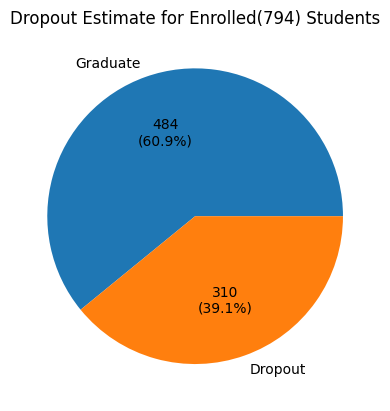

In [ ]:
enrolled_students = df_viz[df_viz['Target'] == 'Enrolled'].shape[0]

dropout = enrolled_students * 0.391
graduate = enrolled_students * 0.609

# Data for the pie chart
categories = ['Graduate', 'Dropout']
values = [graduate, dropout]

# Function to display actual numbers instead of just percentages
def displayNumAndPercent(pct, allvals):
    absolute_value = int(round(pct/100.*sum(allvals)))
    return f"{absolute_value}\n({pct:.1f}%)"

# Create a pie chart with actual number values
plt.pie(values, labels=categories, autopct=lambda pct: displayNumAndPercent(pct, values))

# Set plot title
plt.title('Dropout Estimate for Enrolled(794) Students')

# Show the plot
plt.show()

**Results**

The above pie chart shows that out of the 794 students currently enrolled, an estimate of **310** will dropout before the finish.

###Distribution of enrollment in courses

Using a barchart, we can easily understand the distribution of enrollment throughout the SD dataset. The graph allows us to look at courses that are more frequently studied than others, and has the potetnial for us to highlight if the dropout rate has any corelation with the course a student/s pick.

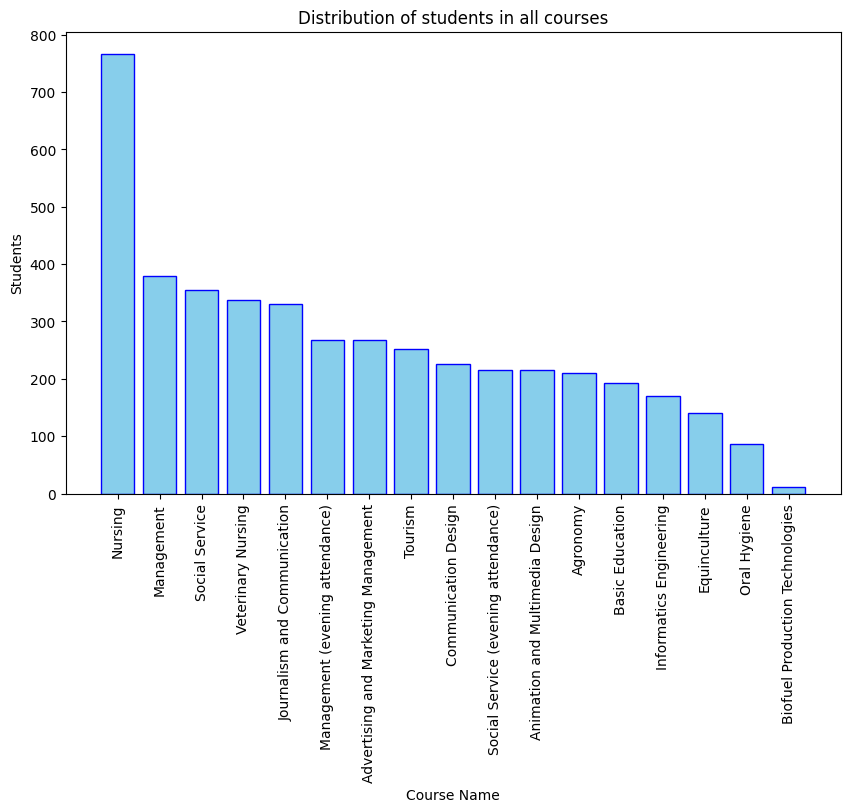

In [ ]:
# Count the occurrences of each unique value in the 'Category' column
course_count = df['Course'].value_counts()

# Extracting category names and corresponding counts for the bar chart
categories = course_count.index
counts = course_count.values

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(categories, counts, color='skyblue', edgecolor='blue')

# Set labels and title
plt.xlabel('Course Name')
plt.ylabel('Students')
plt.title('Distribution of students in all courses')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for better visibility

# Show the bar chart
plt.show()

Here we can clearly see that the **nursing** course is significantly the most popular choice among students. With **Biofuel production Technologies** being the least popular among students

#**Bivairiate Analysis**

### Correlations and Probability testing

Below I am going perform a bivariate analysis between two columns in the SD dataset in order to try and distinguish if there are any corelations betwen the data.

To perform this task I will first drop any unnecessary columns to isolate the two columns that I want to work with. Then we will calculate the correlation coefficient and the P value bewteen the two columns.

**Correlation Coefficient:** This is a numerical measure of some type of a statistical relationship between two numeric variables using an absolute scale between -1 & 1. 1 being an absolute correlation. -1 meaning that there is no correlation.

**P(probability) Value:** This a number describing how likely it is that your data would have occurred under the null hypothesis of your statistical test.

We will look at the relation ship between the fowlloing columns:

**age enrollment - course selected**

**Unemployment rate - Inflation rate**

**Course - Target**

In [ ]:
# Select two numerical columns for the bivariate analysis
column1 = 'Age_at_enrollment'
column2 = 'Course'

# Drop rows with missing values in the selected columns
df_viz = df_viz.dropna(subset=[column1, column2])

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_viz[column1], df_viz[column2])

print("Correlation coefficient:",correlation_coefficient)
print("P-value:",p_value )

if p_value < 0.05:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("There is no statistically significant correlation.")


Correlation coefficient: -0.03712152672882398
P-value: 0.013551243854689686
The correlation is statistically significant at the 5% level.


In [ ]:
# Select two numerical columns for the bivariate analysis
column1 = 'Inflation_rate'
column2 = 'Unemployment_rate'

# Drop rows with missing values in the selected columns
df_viz = df_viz.dropna(subset=[column1, column2])

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_viz[column1], df_viz[column2])

print("Correlation coefficient:",correlation_coefficient)
print("P-value:",p_value )

if p_value < 0.05:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("There is no statistically significant correlation.")

Correlation coefficient: -0.02887689404258924
P-value: 0.05481573724918502
There is no statistically significant correlation.


In [ ]:
#changing taregt to numerical values for analysis
Target_Mapping = {
    'Dropout':1,
    'Graduate':2,
    'Enrolled':3
}

# Apply the mapping to the 'Gender' column
df_viz['Target'] = df_viz['Target'].apply(lambda x: Target_Mapping.get(x, x))

# Select two numerical columns for the bivariate analysis
column1 = 'Course'
column2 = 'Target'

# Drop rows with missing values in the selected columns
df_viz = df_viz.dropna(subset=[column1, column2])

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_viz[column1], df_viz[column2])

print("Correlation coefficient:",correlation_coefficient)
print("P-value:",p_value )

if p_value < 0.05:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("There is no statistically significant correlation.")

Correlation coefficient: -0.010393670863425037
P-value: 0.4895272034232694
There is no statistically significant correlation.


**Results**

**Age enrollment - Course selected:**

the bivariate analysis of these two columns show that there is no significant relationship between these two values at all. Meaning that the age of a student, does not affect their choice in course when deciding what to study.

**inflation - unemployment rate**

These columns also showed similar results. showing that there is no statistical correlation between the inflation rate and unemplyment rates of the students.

**Course - Target**

We can cleary see that there is a much higher P Value relationship between these two columns that what has been presented in analysis of previous columns. Meaning that there is a higher probability of the Course choice affecting the target . This indicates that there is a moderately low coreelation between target and course, and that certain courses have higher dropout rates than others.

###Heat Map



Another feature I will use to try to guage any correlations of attributes in a heat map. This collates all the selected collumns in our dataframe and generates a colour-coded matrix, in which the colours represent the correlation between the 2 collumns that intersect that point of the grpah at a right angle. Blue represents a negative corelation, white no corelation, and red is apositive correlation. This is a much faster way to spot any given relations between the dataset, and the visual aspect makes it much easier on the eyes than numerical data.

In [ ]:
# Heat map showing correlation of Individual columns to one and other
fig = px.imshow(df_viz.drop('Target', axis = 1).corr().round(2), text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout(title = 'Correlation Analysis for Individual Attributes', height=800, width=1500)


**Results**

We can see from the outcome of this graph that there are some collumns that I overlooked initially that do have a correlation to each other:

**Significant Positive correlation:**

*   Mothers qualification and fathers qualificaiton
*   marital status and age at enrollment

**Significant Negative correlation:**

*   Age at enrollment and applicaiton order
*   Unemployment rate and GDP






### Crosstabulation

Another way of analysing the relationships between two columsn is to comebine them into one visualisation graph. This is called crosstabulating data. Here I am going to continue to invesgitage potential factors that I feel could have an effect on the drop out rate of students. I willfocus on the following columns of data and crosstabulate them in different ways in order to better understand their relationship to each other.  

**Target** and **Gender**

**Course** and **Gender**

**Course** and **Target**

**Course** and **Age_ranking** (new coulm created below - derives from age collumn)

**Target** and **Age_ranking**

to do this, I will start by making a clean copy of the cleaned version of the SD dataset. This will ensure that any issues that may occur will not tamper the original dataset.

I then use the crosstab fucntion from the pandas library that will automatically join two collumns of data together. I will make two crosstabulations of each set of collumns; one with the raw data, and another with the distribution displayed as a percentage for each unique value type; this is achieved by multiplying by 100 when you first initialize the graph.

Each graph will be displayed along side the raw data, and the percentages. In some cases the raw data is not as valuable so in those cases I have left them out and just displayed percentage data along with the graph.

###Crosstab - Target and Gender

Cross-tabulation of 'Gender' and 'Target':

Target  Dropout  Enrolled  Graduate
Gender                             
Female      720       487      1661
Male        700       307       548

---------------------------------------------------------------
Cross-tabulation of 'Gender' and 'Target' (percentages):

Target    Dropout   Enrolled   Graduate
Gender                                 
Female  25.104603  16.980474  57.914923
Male    45.016077  19.742765  35.241158


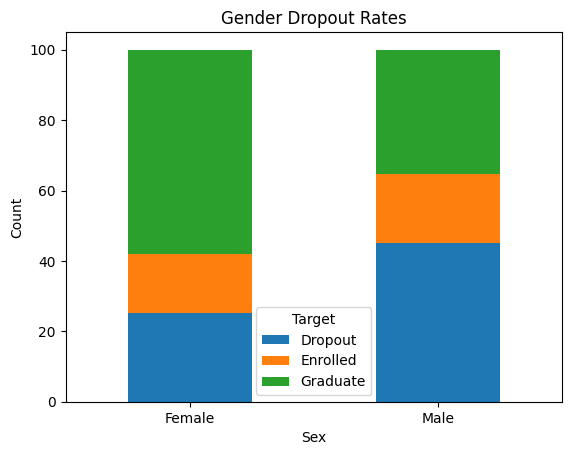

In [ ]:
#making a fresh copy of the dataframe
df_viz = df_cleaned.copy()

#changing gender back to Text values for graph
df_viz['Gender'] = df_viz['Gender'].map({1:'Male', 0:'Female'})

#changing course titles back to text for graph
df_viz['Course'] = df_viz['Course'].map({1: 'Biofuel Production Technologies',
 2: 'Animation and Multimedia Design', 3: 'Social Service (evening attendance)',
 4: 'Agronomy', 5: 'Communication Design', 6: 'Veterinary Nursing',
 7: 'Informatics Engineering', 8: 'Equiniculture', 9: 'Management',
 10: 'Social Service', 11: 'Tourism', 12: 'Nursing', 13: 'Oral Hygiene',
 14: 'Advertising and Marketing Management', 15: 'Journalism and Communication',
 16: 'Basic Education', 17: 'Management (evening attendance)'})


#########################################################################################

gender_target = pd.crosstab(df_viz['Gender'], df_viz['Target'])

# Display the cross-tabulation
print("Cross-tabulation of 'Gender' and 'Target':")
print("")
print(gender_target)
print("")
print("---------------------------------------------------------------")
#Perform a cross-tabulation with percentages
gender_target_percent = pd.crosstab(df_viz['Gender'], df_viz['Target'], normalize='index') * 100
print("Cross-tabulation of 'Gender' and 'Target' (percentages):")
print("")
print(gender_target_percent)

# Plot a bar chart to visualize the cross-tabulation
gender_target_percent.plot(kind='bar', stacked=True)
plt.title("Gender Dropout Rates")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

**Results**

Just from visualising the data, we can clearly see that the number of dropout between Men and Women are not equal at all. at the current rate, Enrolled Men are almost twice as likely to end up dropping out than their counter parts, which is a stagering difference.

Almost 60% of females have graduated, while only 35% on males have.

Next thing I will take a look at is the difference in gender between courses. I predict that if there is an uneven spread in gender between certain courses. Then we can dertermine/predict a higher drop out rate from a given course if the vast majority enrolled are male.

to do this I will crosstabulate the **Gender** and **Course** columns



###Crosstab - Course and Gender

gender and course relation:
Gender                                Female  Male
Course                                            
Advertising and Marketing Management     146   122
Agronomy                                  61   149
Animation and Multimedia Design           98   116
Basic Education                          183     9
Biofuel Production Technologies            3     9
Communication Design                     130    96
Equiniculture                             79    62
Informatics Engineering                    7   163
Journalism and Communication             216   115
Management                               218   162
Management (evening attendance)          132   136
Nursing                                  617   149
Oral Hygiene                              67    19
Social Service                           309    46
Social Service (evening attendance)      173    42
Tourism                                  152   100
Veterinary Nursing                       277    60

Ge

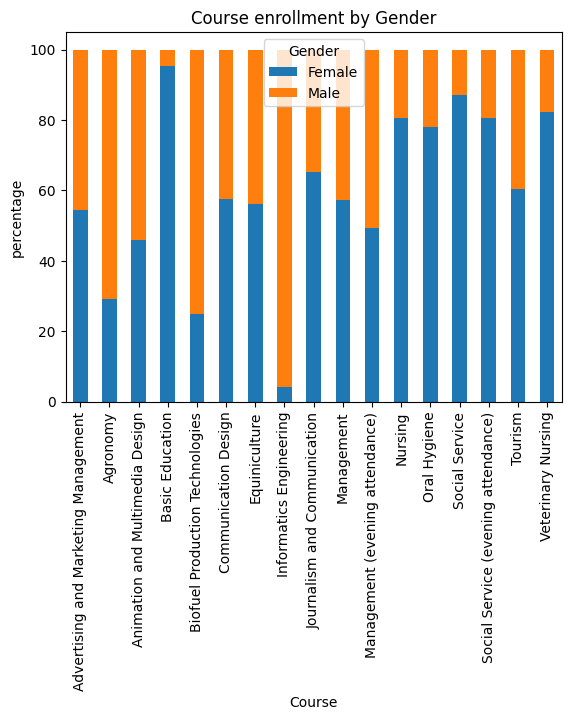

In [ ]:
gender_course = pd.crosstab(df_viz['Course'], df_viz['Gender'])

# Display the cross-tabulation
print("gender and course relation:")
print(gender_course)
print("")
# Perform a cross-tabulation with percentages
gender_course_percent = pd.crosstab(df_viz['Course'], df_viz['Gender'], normalize='index') * 100
print(gender_course_percent)

# Plot a bar chart to visualize the cross-tabulation
gender_course_percent.plot(kind='bar', stacked=True)
plt.title("Course enrollment by Gender")
plt.xlabel("Course")
plt.ylabel("percentage")
plt.xticks(rotation='vertical')
plt.show()

**Results**

Most courses seem to be leaning towards evenly distrubted or female dominated. There are a few outliers though, **Agronomy,  informatics engineering and Biofuel production techonolgies are heavily dominated by male students.** If our hypotenues is correct, then if we crosstabulate the Coure and Target columns, we should see an a significant rise in drop out rates from those three subjects.

###Crosstab - Target and Course

course and drop out rates '%':
Target                                  Dropout   Enrolled   Graduate
Course                                                               
Advertising and Marketing Management  35.447761  17.910448  46.641791
Agronomy                              40.952381  17.619048  41.428571
Animation and Multimedia Design       37.850467  17.289720  44.859813
Basic Education                       44.270833  26.041667  29.687500
Biofuel Production Technologies       66.666667  25.000000   8.333333
Communication Design                  22.566372  18.584071  58.849558
Equiniculture                         55.319149  14.893617  29.787234
Informatics Engineering               54.117647  37.647059   8.235294
Journalism and Communication          30.513595  10.271903  59.214502
Management                            35.263158  28.421053  36.315789
Management (evening attendance)       50.746269  20.149254  29.104478
Nursing                               15.404700  13.054830 

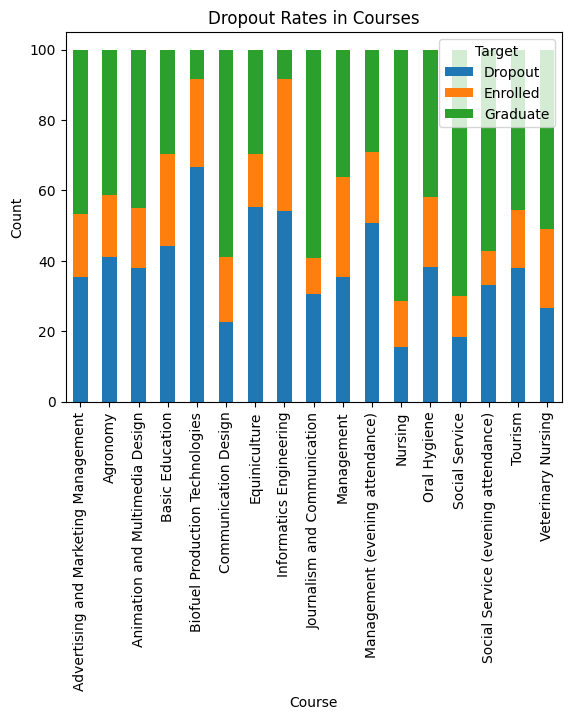

In [ ]:

print("course and drop out rates '%':")
# Perform a cross-tabulation with percentages
target_course_percent = pd.crosstab(df_viz['Course'], df_viz['Target'], normalize='index') * 100
print(target_course_percent)

#calculating the mean drop out rate to determijne which courses are higher than average
dropout_mean = target_course_percent.Dropout.mean()
print("")
print('Mean Dropout Percentage: ')
print(dropout_mean)

# Plot a bar chart to visualize the cross-tabulation
target_course_percent.plot(kind='bar', stacked=True)
plt.title("Dropout Rates in Courses")
plt.xlabel("Course")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()





**Results**

Our results came out as expected:

**Agronomy had a 40.95% drop out rate**

**Biofuel Production Technologies has a 66.66% dropout rate**

**Informatics Engineering had a 54.11% dropout rate**

These values are all significantly higher than the mean dropout rate of 37.8%. Which would suggest that the small correlation between course and dropout rate, is actually more to do with the majority gender of the enrolled students, not the course itself.



###Crosstab - Age and Course

Cross-tabulation of 'Course' and 'Age Ranking' (percentages):

age_ranking                                0-21      22-29      30-40  \
Course                                                                  
Advertising and Marketing Management  73.134328  17.537313   7.089552   
Agronomy                              31.904762  38.095238  19.523810   
Animation and Multimedia Design       80.841121  15.887850   3.271028   
Basic Education                       75.000000  13.541667   8.854167   
Biofuel Production Technologies        8.333333  41.666667  50.000000   
Communication Design                  78.761062  15.044248   3.982301   
Equiniculture                         61.702128  24.113475   9.929078   
Informatics Engineering               58.235294  22.352941  16.470588   
Journalism and Communication          85.196375   9.365559   1.510574   
Management                            66.052632  20.526316   7.894737   
Management (evening attendance)        2.985075  38.059701  4

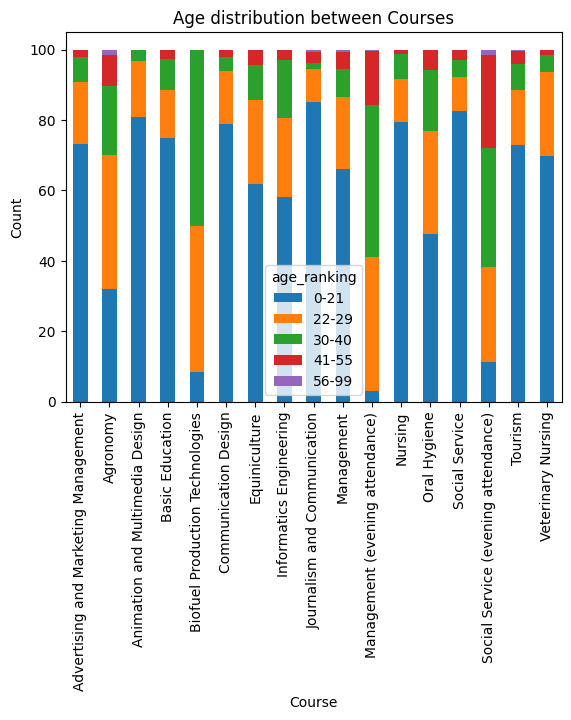

In [ ]:
# Define age categories
age_ranges = [(0, 21), (22, 29), (30, 40), (41, 55), (56, 99)]
age_labels = ['0-21', '22-29', '30-40', '41-55', '56-99']

# Loop through 'Age_at_enrollment' column and categorize ages
age_ranking = []
for age in df_viz['Age_at_enrollment']:
    for idx, (start, end) in enumerate(age_ranges):
        if start <= age <= end:
            age_ranking.append(age_labels[idx])
            break
    else:
        # Handle cases outside the specified ranges
        age_ranking.append('Unknown')

# Create a new column 'age_ranking' in the DataFrame
df_viz['age_ranking'] = age_ranking


age_course = pd.crosstab(df_viz['Course'], df_viz['age_ranking'])

# Display the cross-tabulation
#Perform a cross-tabulation with percentages
age_course_percent = pd.crosstab(df_viz['Course'], df_viz['age_ranking'], normalize='index') * 100
print("Cross-tabulation of 'Course' and 'Age Ranking' (percentages):")
print("")
print(age_course_percent)

# Plot a bar chart to visualize the cross-tabulation
age_course_percent.plot(kind='bar', stacked=True)
plt.title("Age distribution between Courses")
plt.xlabel("Course")
plt.ylabel("Count")
plt.xticks(rotation='vertical')

plt.show()

**Results**

This crosstabulation shows that there is somewhat of a consistency between the age rankings and the courses. most courses - while percentages vary - have the same distribution ranking between age groups:

**In order of most to least:**

**0-21**

**22-29**

**30-40**

**41-55**

**56-99**

only a couple of courses stray from this pattern. Social services(evening) and biofuel technologies - these courses both have a higher proportion of 30-44 years than 0-21's and 22-29's.

for the vast majority of courses the largest proportion of students are in the 0-21 group. However, this is not the case for 4 courses:

**Agronamy**

**BioFuel Production**

**Management(evening)**

**Social Servcices(evening)**

the data also shows that most evening classes are dominated by older students rather than younger ones.

###Crosstab - Age and Target

Cross-tabulation of 'Course' and 'Age Ranking' (percentages):

Target         Dropout   Enrolled   Graduate
age_ranking                                 
0-21         22.075209  18.837047  59.087744
22-29        47.738095  19.404762  32.857143
30-40        55.761317  13.168724  31.069959
41-55        50.471698  12.264151  37.264151
56-99        53.846154   0.000000  46.153846


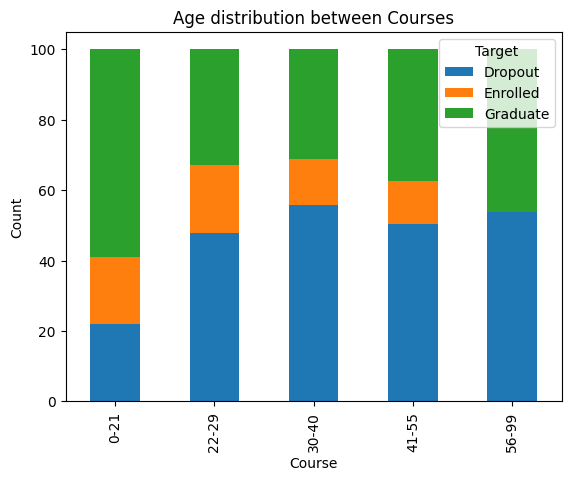

In [ ]:
age_target = pd.crosstab(df_viz['Target'], df_viz['age_ranking'])

# Display the cross-tabulation
#Perform a cross-tabulation with percentages
age_target_percent = pd.crosstab(df_viz['age_ranking'], df_viz['Target'], normalize='index') * 100
print("Cross-tabulation of 'Course' and 'Age Ranking' (percentages):")
print("")
print(age_target_percent)

# Plot a bar chart to visualize the cross-tabulation
age_target_percent.plot(kind='bar', stacked=True)
plt.title("Age distribution between Courses")
plt.xlabel("Course")
plt.ylabel("Count")
plt.xticks(rotation='vertical')

plt.show()

**Results**

The data for this graph tells me that the dropout rate among different age groups trends towards higher as the age group increases. only around 20% of students bewteen 0-21 drop out which doubles once students hit 22-29 years old. As the age ranks increase the drop out rate steadily increases as well, only with a small drop in the 41-55 age rank.

It also shows that enrollment favours younger age ranks, only slightly though. the amount of enrolled students descreases as the age rank goes up.

# **Conclusion**



In conclusion, the SD dataset has proven to be a useful indicator to help understand the factors that may/may-not impact a students success rate in their educational studeis.
<br>
<br>

**Cnetral Tendancy Measures**

I used the describe function to analyse the full dataframe of numerical values which gave insight into any meaningful (and also unmeaningful) statistical data such as averages, means and percentiles. through the use of this functions we gathers some useful information on the dataset:


*   over 75% of the students are single.
*   the average number of pervious qualifications of the students is 4.5 compared to the highest amount being 43. Over 75% of students only had 1 previous qualification.
*   Fathers and mothers of the students roughly held the same amount of qualifications.
*   the mean of gender sits at 0.352, meaning that there are more girls that boys studying.
*   the vast majority of students are 25 or younger.
<br>
<br>



I made use of the histgram visualisation to display the distribution betwene Target outcomes of students. Through this we found out how many students were in what category:



1.   Dropout - 2209
2.   Graduated - 1420
3.   Enrolled - 794<br>

These figures were then represented in a Pie chart. I then removed the 'Enrolled' attribute (students still studying) which gave me the overall drop out rate of students which is **39.1%**

using this figure, I was able to calculate that **of the 794 students currently studying, an estimate of 310 would drop out**

I also made use of the bar function to visualize the overall distribution of enrollment between courses. With this, I found that there was a big disparety between courses studied. The nursing course is significantly the most popular choice among student with Biofuel production Technologies being the least popular among students - the difference between these courses was over 700 students. This is a huge difference and may inidctae that any factors that lead to a higher drop out rate might also be linked to a students choice of course, if a particular course was to have less perticipants and a high drop out rate, it would singify that the course was very hard to pass.   

<br>



**Correlations and Relationships**

In an attempt to find correlations between columns we made use of the P value and correlaion coefficent. However, of the columns we analysed, the data seemed to relate to each other very loosely with no majorly signifcant relations. We did find a slight correaltion between the course and the target, which would suggest that the drop out rate from course to course is not equal, and some courses have disproportionately higher drop out rates than others - I managed to proves this in a later stage of the investigation which I will cover more below.

The use of heatmaps proved to be a better indicator as providing insight into the relationships between columns, as it allowed me to test each columns againts all other columns in the dataframe in one go, whilsts visualising the data in an easy to read manor. The results of the heatmap showed that there were a few significant relations between collumns:


**Significant Positive correlation:**


*   Mothers qualification and fathers qualificaiton
> - this suggests that mothers and fathers qualifications are linked, and that perhaps this is a contributing factor that will impact their childrens success in studying


*   marital status and age at enrollment
> - this suggests that as the age goes up, the martial status probability leans further towards 'married' which makes sense as the majorty of single students were of a younger age


**Significant Negative correlation:**


*   Age at enrollment and applicaiton order
> - this suggests that as the age increases the likelyhood of an applicant choosing their 2nd/3rd/4th choice goes down - this would make sense as older applicants are probably more likely to know exactly what they want to do, where as younger students are probably more likely to apply for multiple things to keep their options open.
*   Unemployment rate and GDP
> - this suggests that a students unemployment rate goes up, there GDP will go down, which again makes sense as they would most likely spend more time out of work if there employment rate was higher and in theory make less money.

<br>

**Crosstabulations**

Another wayI sought out to identify and relatrions between data that would hel pindicate drop out rates was to merge 2 collumns of data together in order to view their relaitons to each other and review the outcomes. I done this to multiple columns:

**Target and gender**
*  the merging of these two tables showed that there is an unequal disperity of dropouts among genders, with a significantly higher proportion of males dropping out over females. It is unclear from this graph alone as to why. To formulate a better idea of why i decided to lok at which courses were being studied by both males and females.

**Course and Gender**
*  Here there is a huge discrepancy again, with some courses being domiated (>80%) by females, and otheres by males (>80%).
*  with this information i concluded that if we know the ratio between male and females in a given course, then I can estimate if there will be a high dropout rate, to test this I crosstabulated the Target and course columns to see the drop out rates for each course.

**Course and Target**
* As expected and shown from this graph, we can see that courses with a higher percentage a females have a much higher graduation rate than courses with prodominatly males (on average).

The 3 most heavily enrolled male course were Agronomy, Bio fuel, and informatics Engineering. As we can see these courses presented a significantly higher drop out rate than the mean of 37%


*  Agronomy had a 40.95% drop out rate
* Biofuel Production Technologies has a 66.66% dropout rate
* Informatics Engineering had a 54.11% dropout rate

this proves that **the dropout rates of a given course depend highly on the gender ratio of its enrolled students** - This highlights that for some reason male students eem to be more vulnerable to dropping out than females. Perhaps in order to increase the overall graduation rates, better attention and support could be provided to this group to aid them in their studies. More analysis would need to be taken in order to understand the facors that depreciate the male graduation rate.

**Age and Course AND Age and Target**

the two mergings of these columns shows that the vast majorty of courses are domiated by youngers students and follow the same pattern of age ranking (on average):

* In order of most to least:
> - 0-21
> - 22-29
> - 30-40
> - 41-55
> - 56-99

The merginf of Age and Target also revealed that the dropout rate amongs students tends to get higher as students get older. The dropout rate of 0-21 year old students averages at 20%, whereas the higher age rankings of 22+ see's a huge increase to over 40%. More analysis will need to be done in order to figure out why this is. As for the mean time, a short term solution to decrease the overall dropout rate of students would be to identify age as a potential risk factor in a students likelyhood of graduation, and provide support for students in higher age rankings to ensure they have the means of graduating.









